# NHL Players Classification

In [39]:
import pandas as pd
import sqlite3

con = sqlite3.connect("db/nhl.db")
nhl = pd.read_sql_query("SELECT person.id,person.positionCode,person.weight,person.height,person.shootsCatches,skaterStats.timeOnIce,skaterStats.assists,skaterStats.goals,skaterStats.shots,skaterStats.hits,skaterStats.powerPlayGoals,skaterStats.powerPlayAssists,skaterStats.penaltyMinutes,skaterStats.faceOffWins,skaterStats.faceoffTaken,skaterStats.takeaways,skaterStats.giveaways,skaterStats.shortHandedGoals,skaterStats.shortHandedAssists,skaterStats.blocked,skaterStats.plusMinus,skaterStats.evenTimeOnIce,skaterStats.powerPlayTimeOnIce,skaterStats.shortHandedTimeOnIce FROM person,skaterStats WHERE person.positionCode != 'G' AND person.id = skaterStats.playerId", con)

## Preview of dataset

In [40]:
nhl.sample(frac=0.01)

,id,positionCode,weight,height,shootsCatches,timeOnIce,assists,goals,shots,hits,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,powerPlayTimeOnIce,shortHandedTimeOnIce
204147,8474641,C,195,72,L,00:14:31.000000,0,0,1,1,...,16,0,0,0,0,0,-2,00:14:29.000000,00:00:02.000000,00:00:00.000000
258290,8477930,L,198,71,L,00:09:51.000000,1,0,2,0,...,11,0,0,0,0,0,1,00:09:23.000000,00:00:00.000000,00:00:28.000000
206946,8478882,D,221,75,L,00:20:52.000000,0,0,0,1,...,0,0,0,0,0,1,-2,00:15:51.000000,00:00:00.000000,00:05:01.000000
188807,8476881,C,215,75,L,00:21:13.000000,1,0,3,0,...,21,2,0,0,0,2,1,00:17:47.000000,00:01:53.000000,00:01:33.000000
33848,8476923,D,205,74,R,00:20:09.000000,1,0,2,0,...,0,1,2,0,0,0,0,00:16:03.000000,00:03:41.000000,00:00:25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172632,8477950,D,180,71,R,00:20:03.000000,1,0,1,2,...,0,0,3,0,0,1,1,00:16:12.000000,00:03:51.000000,00:00:00.000000
171732,8477220,D,194,72,L,00:20:05.000000,0,0,1,1,...,0,1,2,0,0,2,-1,00:15:37.000000,00:02:10.000000,00:02:18.000000
107473,8479974,C,201,74,R,00:12:06.000000,0,0,2,1,...,11,0,0,0,0,0,0,00:09:21.000000,00:02:45.000000,00:00:00.000000
241993,8474641,C,195,72,L,00:19:11.000000,0,0,1,0,...,1,0,2,0,0,0,-1,00:18:32.000000,00:00:39.000000,00:00:00.000000


## Check for null values

In [41]:
nhl.isnull().any().any()

False

## List columns

In [42]:
for col in nhl.columns:
    print(col)

id
positionCode
weight
height
shootsCatches
timeOnIce
assists
goals
shots
hits
powerPlayGoals
powerPlayAssists
penaltyMinutes
faceOffWins
faceoffTaken
takeaways
giveaways
shortHandedGoals
shortHandedAssists
blocked
plusMinus
evenTimeOnIce
powerPlayTimeOnIce
shortHandedTimeOnIce


## Filter bench players

In [13]:
#players that played shorter then 120 minutes for example can be filtered
#nba = nba[nba["MP"] > 120] 

## Convert columns data

In [43]:
nhl['timeOnIce'] = nhl['timeOnIce'].str.split('.').str[0]
nhl['timeOnIce'] = nhl['timeOnIce'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
nhl['timeOnIce']

0         25
1         18
2         13
3         23
4         20
          ..
258545    15
258546    13
258547    17
258548    22
258549    19
Name: timeOnIce, Length: 258550, dtype: int64

In [44]:
nhl['evenTimeOnIce'] = nhl['evenTimeOnIce'].str.split('.').str[0]
nhl['evenTimeOnIce'] = nhl['evenTimeOnIce'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
nhl['evenTimeOnIce']

0         19
1         15
2         12
3         17
4         16
          ..
258545    12
258546    11
258547    14
258548    18
258549    16
Name: evenTimeOnIce, Length: 258550, dtype: int64

In [45]:
nhl['powerPlayTimeOnIce'] = nhl['powerPlayTimeOnIce'].str.split('.').str[0]
nhl['powerPlayTimeOnIce'] = nhl['powerPlayTimeOnIce'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
nhl['powerPlayTimeOnIce']

0         4
1         2
2         0
3         5
4         3
         ..
258545    2
258546    0
258547    3
258548    3
258549    0
Name: powerPlayTimeOnIce, Length: 258550, dtype: int64

In [46]:
nhl['shortHandedTimeOnIce'] = nhl['shortHandedTimeOnIce'].str.split('.').str[0]
nhl['shortHandedTimeOnIce'] = nhl['shortHandedTimeOnIce'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
nhl['shortHandedTimeOnIce']


0         1
1         0
2         0
3         0
4         0
         ..
258545    0
258546    1
258547    0
258548    0
258549    1
Name: shortHandedTimeOnIce, Length: 258550, dtype: int64

In [47]:
nhl.shootsCatches = pd.Categorical(pd.factorize(nhl.shootsCatches)[0])

## Prepare frame for unsupervised learn

In [48]:
test_nhl = nhl.copy()

In [50]:
kb_targets = test_nhl["positionCode"]
print(kb_targets)

0         D
1         L
2         L
3         L
4         C
         ..
258545    L
258546    L
258547    R
258548    C
258549    D
Name: positionCode, Length: 258550, dtype: object


In [55]:
kb_features = test_nhl.drop("positionCode",axis=1)
kb_features

,id,weight,height,shootsCatches,timeOnIce,assists,goals,shots,hits,powerPlayGoals,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,powerPlayTimeOnIce,shortHandedTimeOnIce
0,8474567,222,74,0,25,0,0,1,1,0,...,0,1,1,0,0,2,0,19,4,1
1,8475169,210,74,1,18,0,2,7,5,0,...,2,0,0,0,0,0,1,15,2,0
2,8475149,203,73,1,13,0,0,0,0,0,...,8,0,0,0,0,0,0,12,0,0
3,8471214,238,75,0,23,1,0,8,3,0,...,0,2,2,0,0,1,0,17,5,0
4,8473563,202,73,1,20,0,0,2,1,0,...,16,2,0,0,0,1,0,16,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258545,8477476,179,71,1,15,0,0,3,0,0,...,1,1,0,0,0,2,-3,12,2,0
258546,8477456,190,72,0,13,0,0,5,0,0,...,17,1,0,0,0,1,-2,11,0,1
258547,8478420,215,76,1,17,2,0,5,1,0,...,3,1,0,0,0,0,-2,14,3,0
258548,8477492,200,72,0,22,0,0,6,1,0,...,7,0,1,0,0,0,-2,18,3,0


## Select most important features

In [56]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(kb_features)
selector.get_feature_names_out()

array(['id', 'weight', 'height', 'shootsCatches', 'timeOnIce', 'assists',
       'goals', 'shots', 'hits', 'powerPlayGoals', 'powerPlayAssists',
       'penaltyMinutes', 'faceOffWins', 'faceoffTaken', 'takeaways',
       'giveaways', 'shortHandedGoals', 'shortHandedAssists', 'blocked',
       'plusMinus', 'evenTimeOnIce', 'powerPlayTimeOnIce',
       'shortHandedTimeOnIce'], dtype=object)

In [7]:
from sklearn.feature_selection import SelectPercentile, chi2

selector = SelectPercentile(chi2, percentile=10)
sp_features = test_nba.drop("Pos",axis=1)
sp_targets = test_nba["Pos"]
selector.fit_transform(sp_features, sp_targets)

selector.get_feature_names_out()

array(['TRB', 'AST'], dtype=object)

In [60]:
features = nhl.drop("positionCode",axis=1)
features.drop("id",axis=1,inplace=True)
targets = nhl["positionCode"]

In [61]:
features.sample(frac=0.01)

,weight,height,shootsCatches,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,powerPlayTimeOnIce,shortHandedTimeOnIce
186676,196,74,1,8,0,0,0,1,0,0,...,7,0,0,0,0,0,-1,6,0,1
76693,226,75,1,13,1,0,0,3,0,0,...,0,0,0,0,0,0,1,13,0,0
180620,218,74,1,15,0,0,1,2,0,0,...,0,0,1,0,0,0,-1,13,1,0
145786,200,73,1,21,0,0,2,2,0,0,...,1,0,0,0,0,0,-1,19,2,0
186839,195,74,1,16,0,0,3,4,0,0,...,4,1,0,0,0,0,-1,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121002,203,73,1,17,0,0,1,0,0,0,...,0,1,2,0,0,1,-1,15,2,0
21440,208,75,1,20,2,0,5,3,0,1,...,0,1,0,0,0,0,1,14,3,2
145770,248,78,1,17,0,0,1,1,0,0,...,0,0,0,0,0,1,1,16,0,0
30604,194,73,1,6,0,0,1,1,0,0,...,0,0,0,0,0,0,0,4,1,0


In [62]:
targets.sample(frac=0.01)

110894    C
93117     C
14264     L
163180    D
47700     R
         ..
177614    D
32296     R
158159    D
238386    R
32990     R
Name: positionCode, Length: 2586, dtype: object

## Perform Logistic regression

In [63]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.25,random_state=0,shuffle=True)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', LinearSVC())])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', LinearSVC())])

## Check accuracy

In [64]:
print("Accuracy {:.2f}%".format(pipe.score(X_test, Y_test)*100))

Accuracy 73.52%


## Cross tabulation

In [65]:
print(pd.crosstab(Y_test, pipe.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True))

Predicted      C      D      L     R    All
True                                       
C          15914    809   2401  1774  20898
D              7  20195   1265   857  22324
L           1565   2398   7092   706  11761
R           1045   2306   1986  4318   9655
All        18531  25708  12744  7655  64638


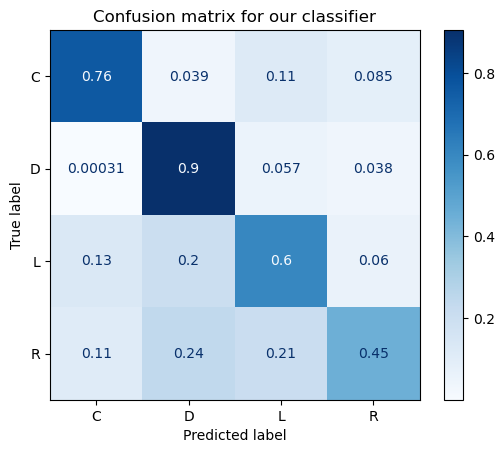

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        pipe,
        X_test,
        Y_test,
        cmap=plt.cm.Blues,
        normalize="true",
)

disp.ax_.set_title('Confusion matrix for our classifier')
plt.show()

## Cross validation

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0))
scores = cross_val_score(clf, features, targets, cv=10)

## Check score

In [ ]:
print("Accuracy {}".format(scores))
print("Accuracy: {:.2f}% (+/- {:.2f})".format(scores.mean(),scores.std() * 2))